In [120]:
from typing_extensions import LiteralString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [81]:
train=pd.read_csv('/content/train.csv')
# centre_info= pd.read_csv('/content/fulfilment_center_info.csv')
# meal= pd.read_csv('/content/meal_info.csv')

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [83]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [84]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [85]:
train.isnull()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
456543,False,False,False,False,False,False,False,False,False
456544,False,False,False,False,False,False,False,False,False
456545,False,False,False,False,False,False,False,False,False
456546,False,False,False,False,False,False,False,False,False


In [86]:
train.notnull()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
456543,True,True,True,True,True,True,True,True,True
456544,True,True,True,True,True,True,True,True,True
456545,True,True,True,True,True,True,True,True,True
456546,True,True,True,True,True,True,True,True,True


In [87]:
train.dropna()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [89]:
print(train.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


In [90]:
train.columns.tolist()

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders']

In [91]:
train.nunique()

,0
id,456548
week,145
center_id,77
meal_id,51
checkout_price,1992
base_price,1907
emailer_for_promotion,2
homepage_featured,2
num_orders,1250


In [92]:
cat_cols=train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


id
Skew : -0.0


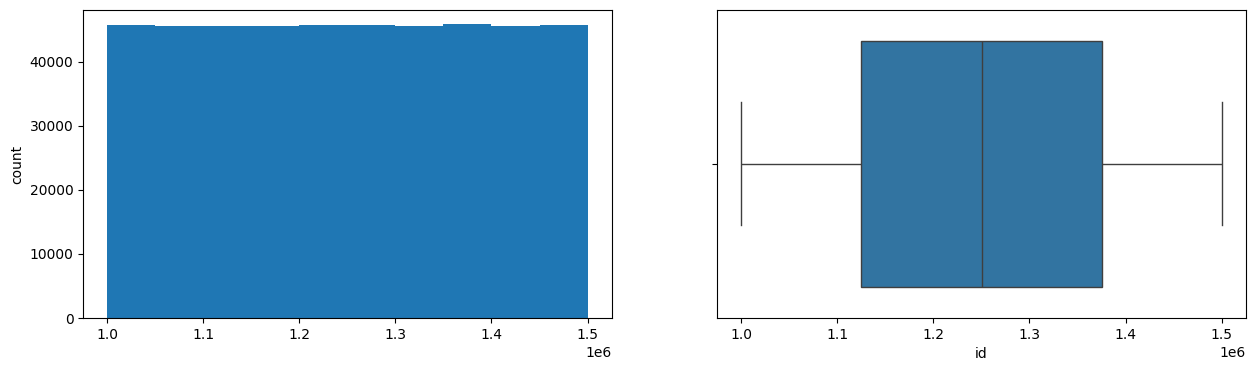

week
Skew : -0.05


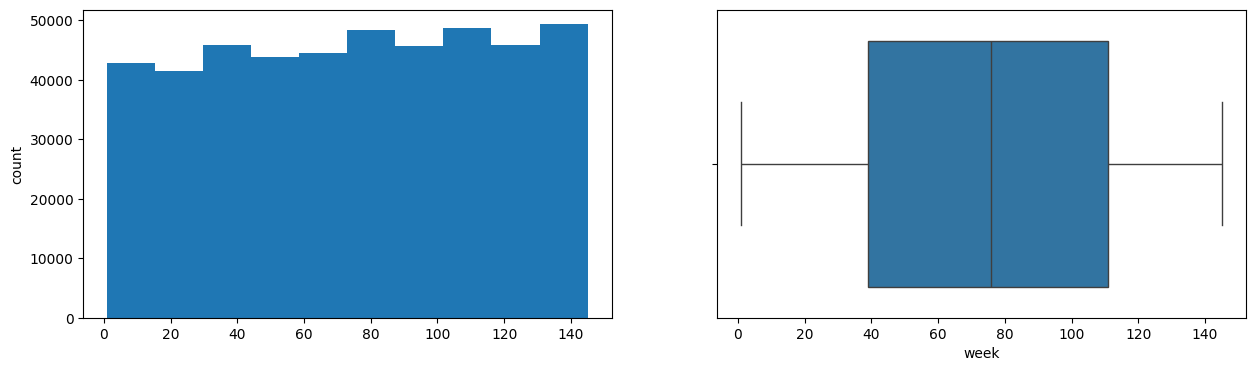

center_id
Skew : 0.35


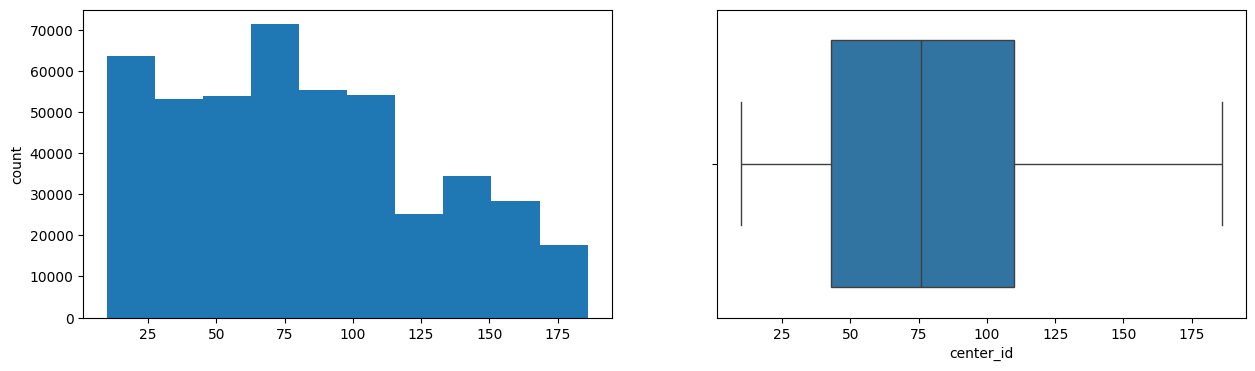

meal_id
Skew : -0.17


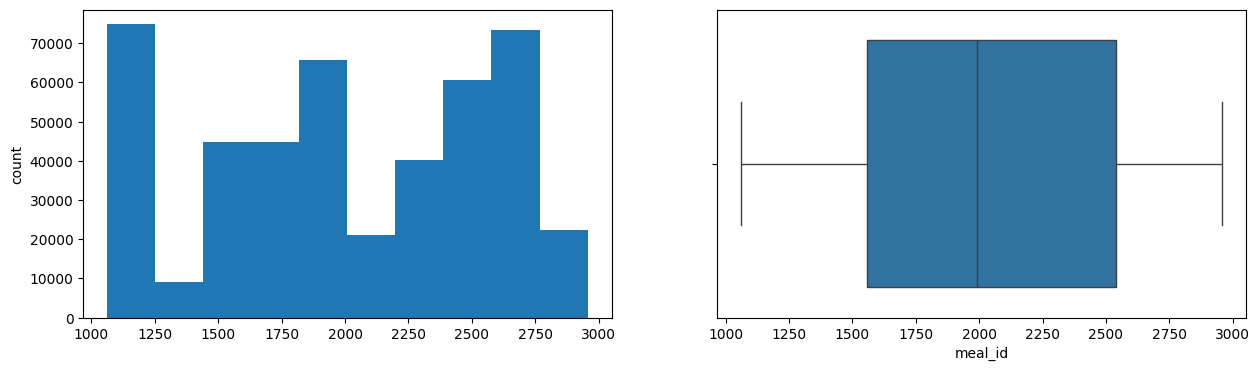

checkout_price
Skew : 0.67


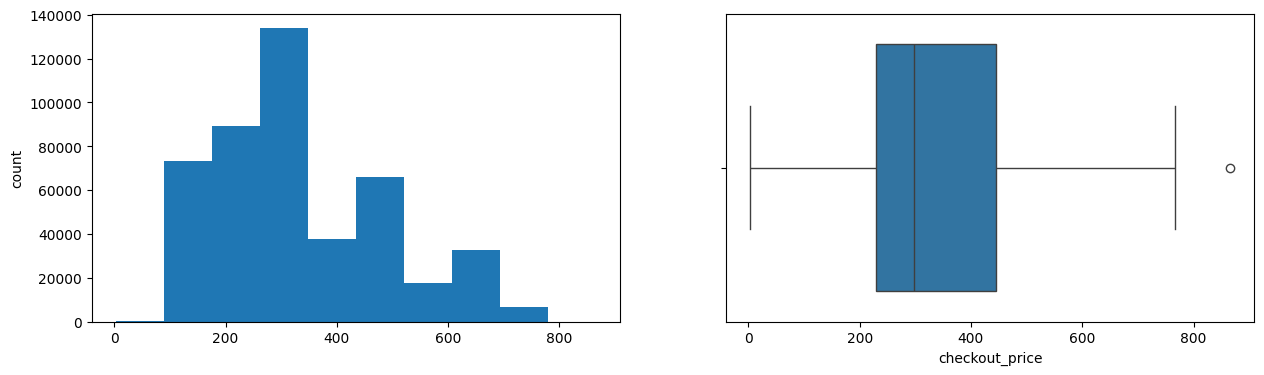

base_price
Skew : 0.64


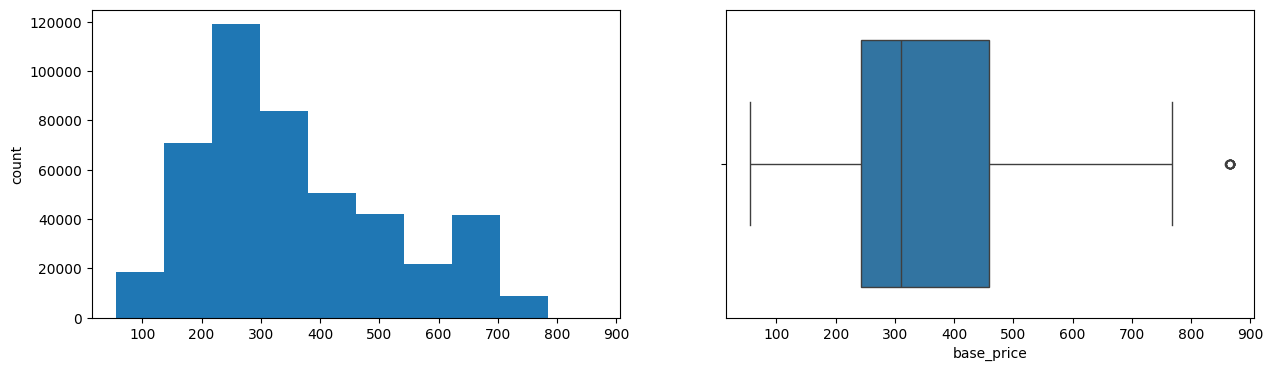

emailer_for_promotion
Skew : 3.07


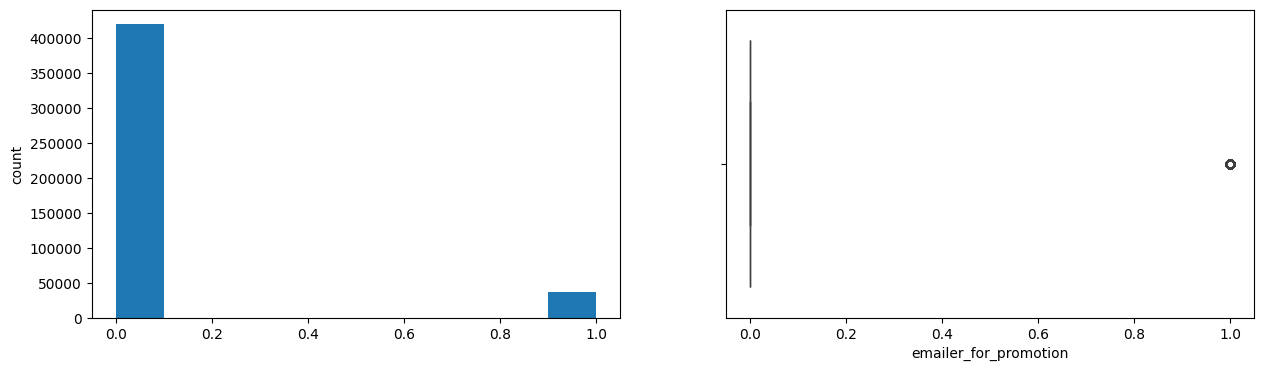

homepage_featured
Skew : 2.51


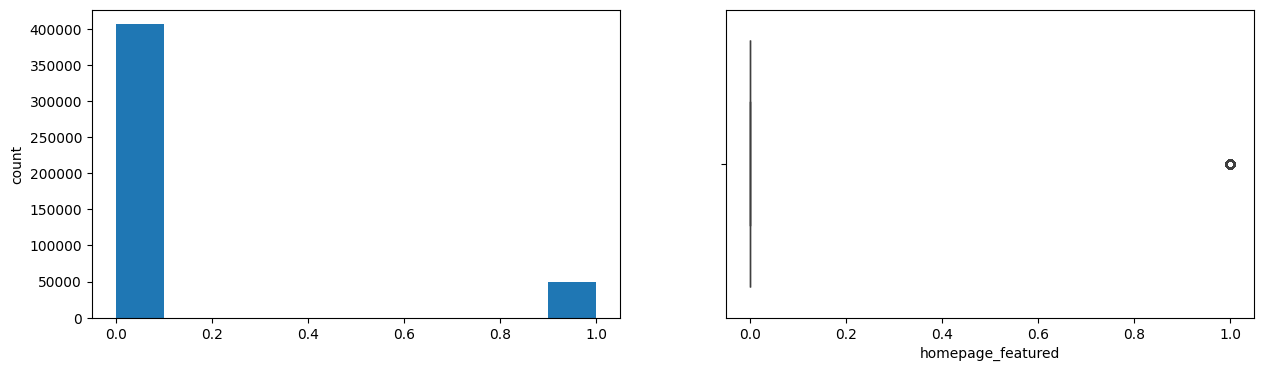

num_orders
Skew : 6.93


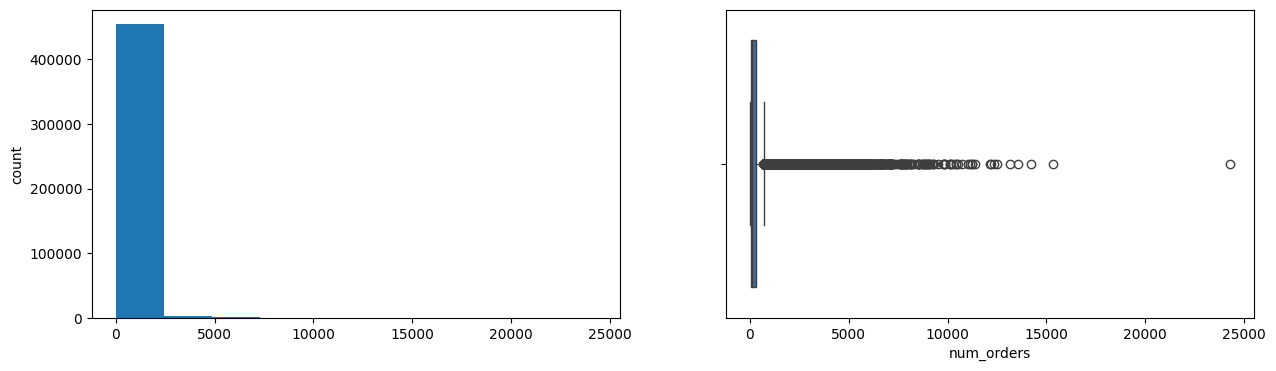

In [93]:
for col in num_cols:
    print(col)
    print('Skew :', round(train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

In [94]:
# SCALING OF NUMERICAL VALUES USING StandardScaler

In [95]:
scaler = StandardScaler()
model= scaler.fit(train)
scaled_data= model.transform(train)

In [96]:
print(scaled_data)

[[ 0.89684455 -1.77649439 -0.58957691 ... -0.29718656 -0.3501233
  -0.21436718]
 [ 1.50232551 -1.77649439 -0.58957691 ... -0.29718656 -0.3501233
   0.02052736]
 [ 0.67121277 -1.77649439 -0.58957691 ... -0.29718656 -0.3501233
  -0.18405821]
 ...
 [-0.96461937  1.69130354 -0.45907119 ... -0.29718656 -0.3501233
   0.60397508]
 [-0.70916521  1.69130354 -0.45907119 ... -0.29718656 -0.3501233
   1.17984555]
 [ 0.77508888  1.69130354 -0.45907119 ... -0.29718656 -0.3501233
  -0.25225339]]


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [98]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


<Figure size 1300x1700 with 0 Axes>

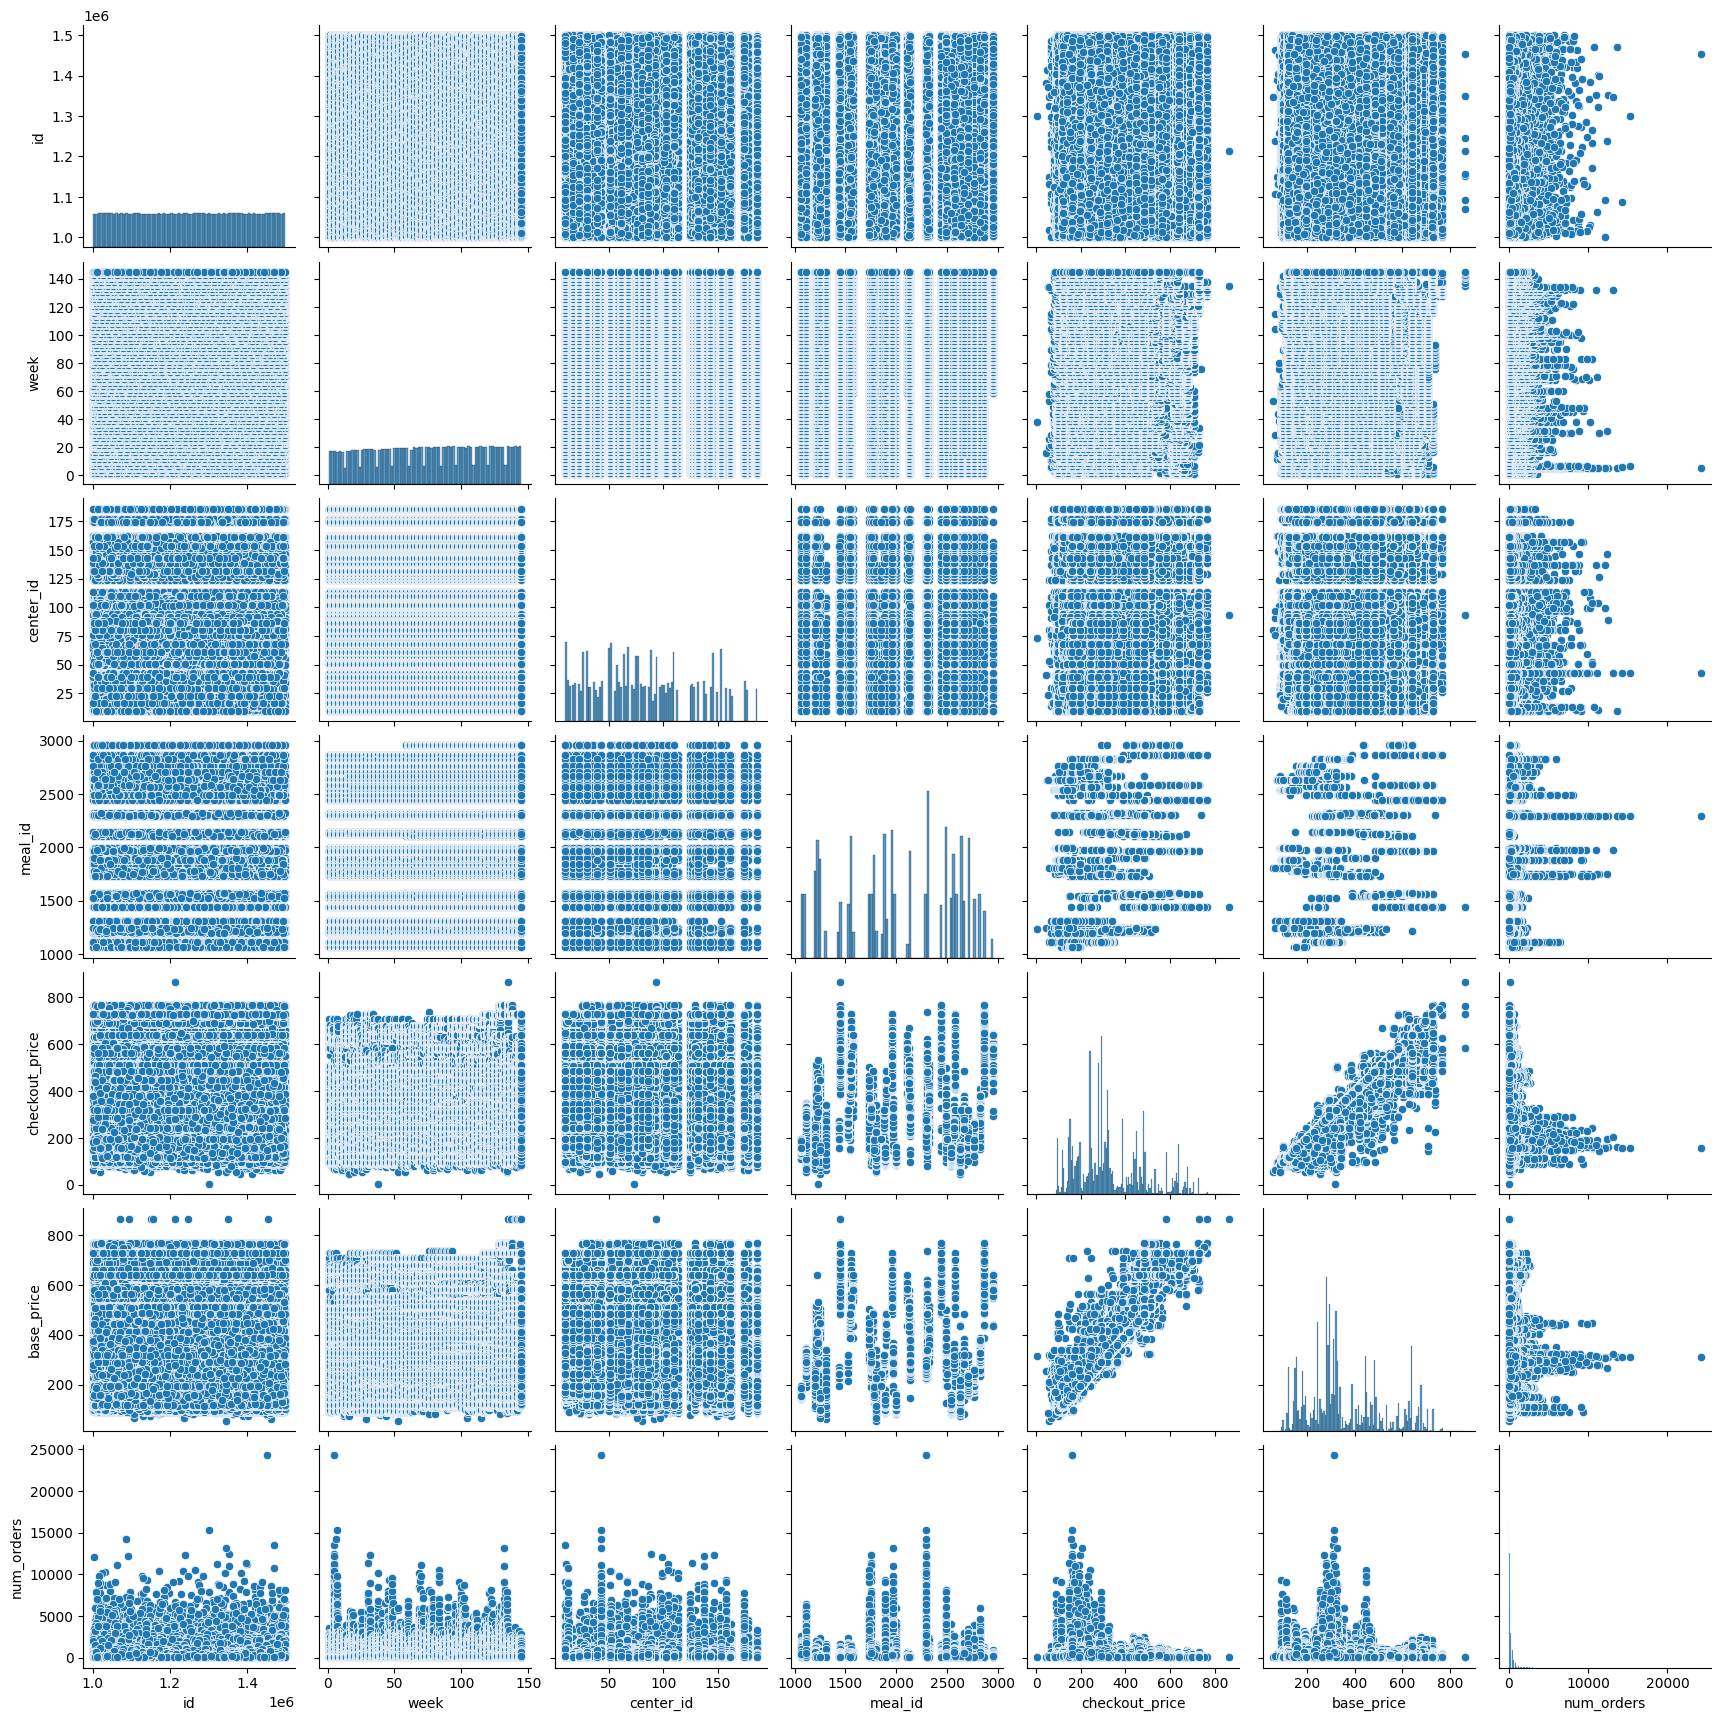

In [99]:
plt.figure(figsize=(13,17))
sns.pairplot(data=train.drop(['emailer_for_promotion','homepage_featured'],axis=1))
plt.show()

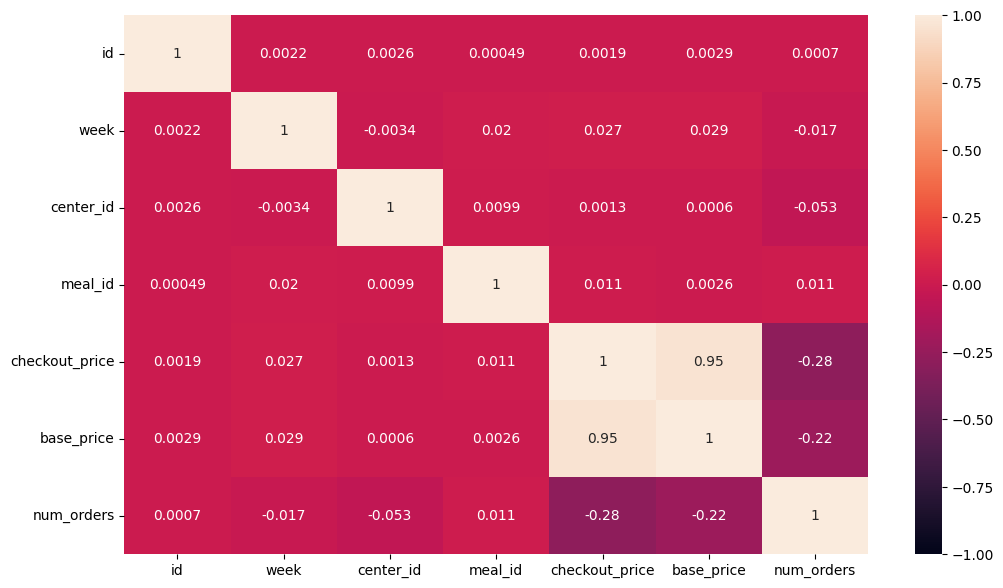

In [100]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.drop(['emailer_for_promotion','homepage_featured'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [111]:
features = train.drop(['emailer_for_promotion', 'homepage_featured'], axis=1)
target = train['num_orders']

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=40)

x_train.shape, x_test.shape,y_train.shape,y_test.shape

((365238, 7), (91310, 7), (365238,), (91310,))

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(y_test)
print(y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [104]:
#MODEL PREDICTION (RMSLE-root mean squared logarithmic error)

In [113]:
def root_mean_squared_log_error(true, pred):
    square_error = np.square((np.log(true + 1) - np.log(pred + 1)))
    mean_square_log_error = np.mean(square_error)
    rmsle_loss = np.sqrt(mean_square_log_error)
    return rmsle_loss

In [116]:
RMSLE = np.square(np.subtract(y_train,y_test)).mean()

In [118]:
print(root_mean_squared_log_error)

<function root_mean_squared_log_error at 0x78b42ff1fe20>


In [121]:
rf_model=RandomForestRegressor

rf_model.fit(x_train,y_train)

y_pred=rf_model.predict(x_test)
mse=mea_sqarred_error(y_test,y_test)
r2=r2_score(y_test,y_test)
RMSLE = root_mean_squared_log_error(y_test,y_test)
print("Mean squarred error",mse)
print("root",r2)
print("RMSLE",RMSLE)



AttributeError: 'DataFrame' object has no attribute '_validate_params'